In [149]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Задание 1

In [150]:
SIZE = 1000
distributions = {'Нормальное распределение': stats.norm.rvs(size=SIZE, loc=50, scale=5),
                 'Экспоненциальное распределение': stats.expon.rvs(size=SIZE, loc=50, scale=5),
                 'Равномерное распределение': stats.uniform.rvs(size=1000, loc=50, scale=5),
                 'Распределение Коши': stats.cauchy.rvs(size=1000, loc=50, scale=5)}

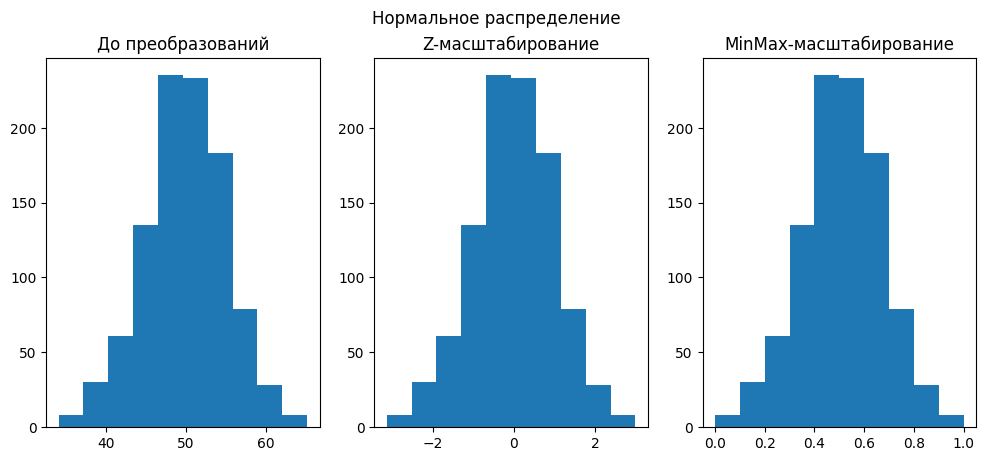

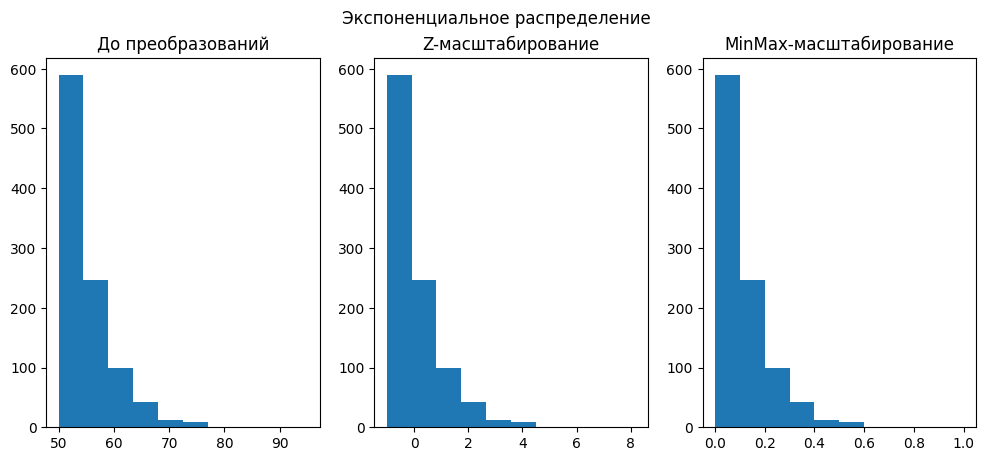

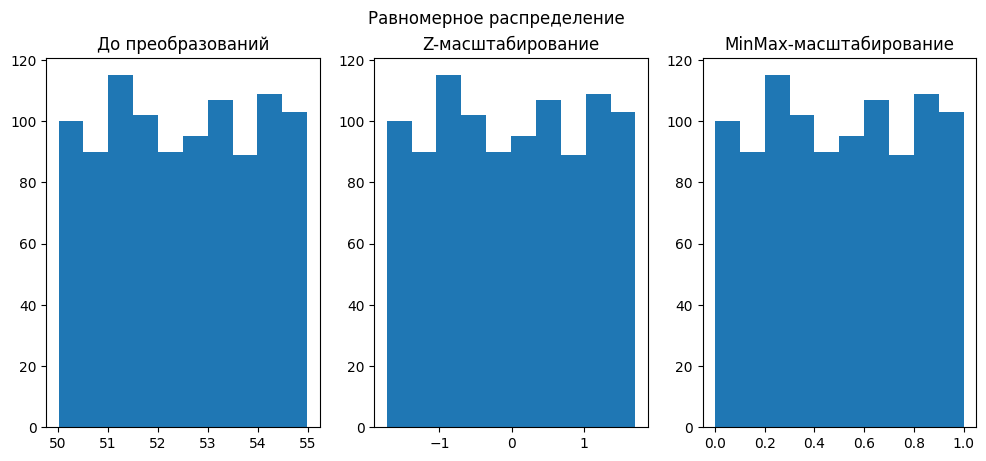

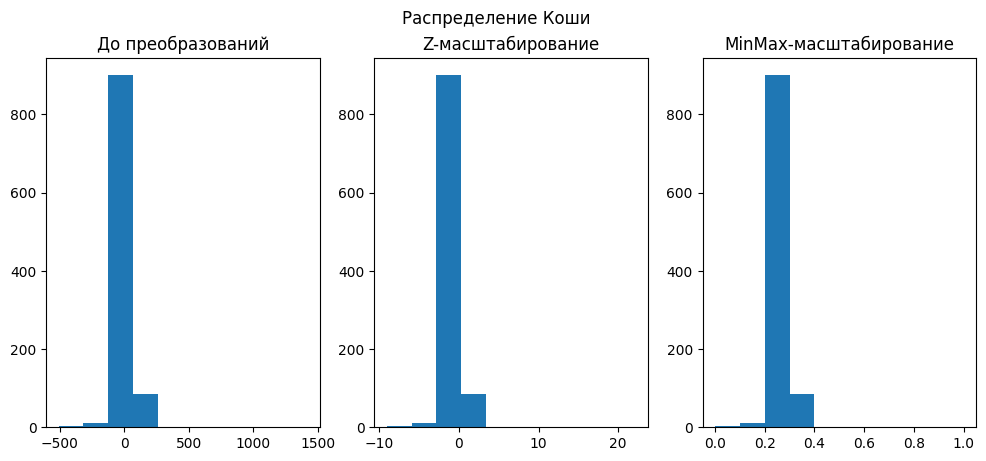

In [151]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
for name, array in  distributions.items():    
    fig, ax = plt.subplots(1, 3)
    fig.suptitle(name)
    fig.set_figwidth(12)
    ax[0].hist(array)
    ax[0].set_title("До преобразований")
    ax[1].hist(standard_scaler.fit_transform(array.reshape(-1, 1)))
    ax[1].set_title("Z-масштабирование")
    ax[2].hist(minmax_scaler.fit_transform(array.reshape(-1, 1)))
    ax[2].set_title("MinMax-масштабирование")
    plt.show()

# Задание 2

In [152]:
columns = ['PassengerId','Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Survived']

titanic_df = pd.read_csv("titanic.csv", usecols=columns)
titanic_df.set_index("PassengerId", inplace=True)
titanic_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked
PassengerId,,,,,,
1,0,3,male,22.0,7.2500,S
2,1,1,female,38.0,71.2833,C
3,1,3,female,26.0,7.9250,S
4,1,1,female,35.0,53.1000,S
5,0,3,male,35.0,8.0500,S


In [153]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 48.7+ KB


In [154]:
titanic_df.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [155]:
# Количество пропусков в каждом столбце
titanic_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [156]:
# Заполнение пропусков
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [157]:
titanic_df[['Age', 'Fare']] = StandardScaler().fit_transform(titanic_df[['Age', 'Fare']])
titanic_df[['Age', 'Fare']]
    

,Age,Fare
PassengerId,,
1,-0.592481,-0.502445
2,0.638789,0.786845
3,-0.284663,-0.488854
4,0.407926,0.420730
5,0.407926,-0.486337
...,...,...
887,-0.207709,-0.386671
888,-0.823344,-0.044381
889,0.000000,-0.176263


In [158]:
def encode_onehot_categorical(frame, columns):
    """
    Кодирует столбцы columns с помощью OneHotEncoder, удаляя первоначальные столбцы.
    :param frame: таблица DataFrame
    :param columns: кодируемые столбцы
    :return: новая таблица
    """
    encoder = OneHotEncoder()
    for column in columns:
        transformed = encoder.fit_transform(frame[[column]]).toarray()[:, 1:]
        new_frame = pd.DataFrame(transformed, columns=encoder.get_feature_names_out()[1:], index=frame.index)
        frame = frame.join(new_frame)
    frame = frame.drop(columns=columns)
    return frame

In [159]:
categorical_columns = ['Pclass', 'Embarked', 'Sex']
titanic_df = encode_onehot_categorical(titanic_df, categorical_columns)
titanic_df

,Survived,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,
1,0,-0.592481,-0.502445,0.0,1.0,0.0,1.0,1.0
2,1,0.638789,0.786845,0.0,0.0,0.0,0.0,0.0
3,1,-0.284663,-0.488854,0.0,1.0,0.0,1.0,0.0
4,1,0.407926,0.420730,0.0,0.0,0.0,1.0,0.0
5,0,0.407926,-0.486337,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
887,0,-0.207709,-0.386671,1.0,0.0,0.0,1.0,1.0
888,1,-0.823344,-0.044381,0.0,0.0,0.0,1.0,0.0
889,0,0.000000,-0.176263,0.0,1.0,0.0,1.0,0.0


In [160]:
titanic_df.describe()

,Survived,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
count,891.000000,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.232906e-16,3.987333e-18,0.206510,0.551066,0.086420,0.725028,0.647587
std,0.486592,1.000562e+00,1.000562e+00,0.405028,0.497665,0.281141,0.446751,0.477990
min,0.000000,-2.253155e+00,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-5.924806e-01,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,-3.573909e-01,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,4.079260e-01,-2.424635e-02,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,3.870872e+00,9.667167e+00,1.000000,1.000000,1.000000,1.000000,1.000000
